## **AI Project**
## **Title** : Classification of Mushrooms (Edible/Poisonous)
## **Aim** : This project aims to predict which features are most indicative of a poisonous mushroom.

## **Team Name** : Curious 4 AI

### **Team** : Sarvani Konda, Venkata Prasanth Pinaka, Srikar Singam and Jayadev Varma Sri Kakarlapudi

In [25]:
# import required packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.graph_objs as gob
import plotly.offline as ply
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [26]:
# import dataset and check the data type and number of samples
mushrooms = pd.read_csv("data/agaricus-lepiota.data",header=None)
mushrooms.columns = ['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

print("The dataframe shape: ",mushrooms.shape)
print("*"*30)
print("Printing first five entries in the Dataframe:")
print(mushrooms.head())

The dataframe shape:  (8124, 23)
******************************
Printing first five entries in the Dataframe:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below

In [27]:
# check the data types of the dataset
print(mushrooms.dtypes)
mushrooms.describe().T

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [28]:
# Checking for null values in the dataset
mushrooms.isnull().sum().sort_values(ascending=False)

class                       0
stalk-surface-above-ring    0
population                  0
spore-print-color           0
ring-type                   0
ring-number                 0
veil-color                  0
veil-type                   0
stalk-color-below-ring      0
stalk-color-above-ring      0
stalk-surface-below-ring    0
stalk-root                  0
cap-shape                   0
stalk-shape                 0
gill-color                  0
gill-size                   0
gill-spacing                0
gill-attachment             0
odor                        0
bruises                     0
cap-color                   0
cap-surface                 0
habitat                     0
dtype: int64

### **Observation** :

 From the above output, it can be seen that there are zero null values in the dataset.

In [29]:
# Value count of class attribute(target).

mushrooms['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [30]:
# Creating pie chart for Target class
x = mushrooms.drop(columns='class')
y = mushrooms['class']

# Renaming classes
y=y.replace('p','poisonous')
y=y.replace('e','edible')
pie_values = pd.Series(y).value_counts()
trace = gob.Pie(labels=['edible','poisonous'],values=pie_values)
ply.iplot([trace])

In [31]:

# Extract the duplicate rows from the original dataframe
print("Duplicate entries: ",mushrooms[mushrooms.duplicated()])
print("\n"+"*"*40+"\n")

# Drop duplicates from the dataset is not needed as from above statement ouput we 
# can see that there are zero duplicates.

# Identify missing values in each feature column
for i in mushrooms.columns:
    print(i,mushrooms[i].unique())
 

Duplicate entries:  Empty DataFrame
Columns: [class, cap-shape, cap-surface, cap-color, bruises, odor, gill-attachment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, veil-type, veil-color, ring-number, ring-type, spore-print-color, population, habitat]
Index: []

[0 rows x 23 columns]

****************************************

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 

### **Observation** :
From the above output it can be observed that 'stalk-root' contains '?' value which is missing data. We need to fill it with reasonable value instead of '?'.

In [32]:
mushrooms['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [33]:
# Imputation Strategy
# Filling '?' in stalk-root attribute with 'b' which has the most frequency.
mushrooms['stalk-root'] = mushrooms['stalk-root'].replace('?','b')
mushrooms['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

## Data Transformation

In [34]:
# Converting each value in a column from a string value to a number using LabelEncoder.
le = LabelEncoder()
for i in mushrooms.columns[:-1]:
    mushrooms[i] = le.fit_transform(mushrooms[i])
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,u
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,g
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,m
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,u
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,g


# Univariate Analysis


In [24]:
# Descriptive Analysis
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef984d2450>,
      dtype=object)

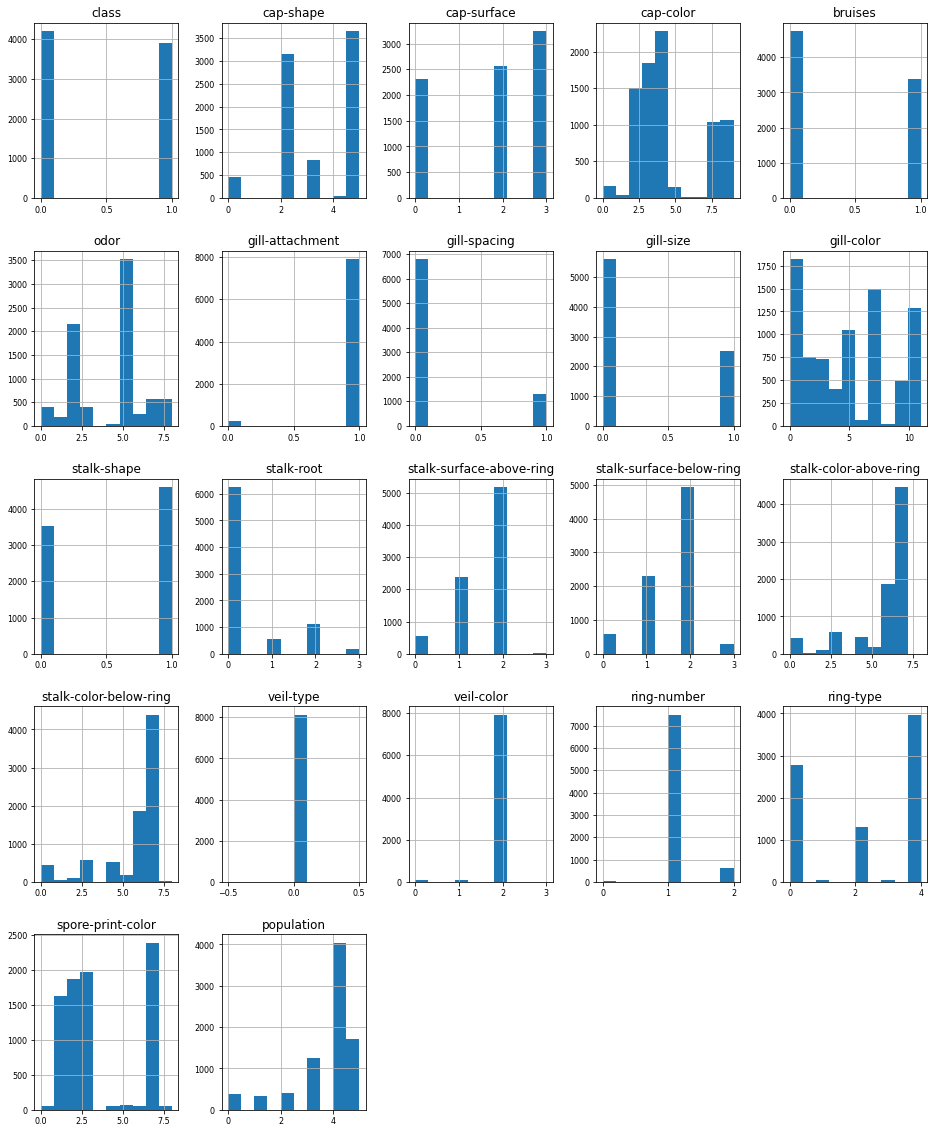

In [35]:
mushrooms.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fef967ac7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fef967aca10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fef96898310>],
 'medians': [<matplotlib.lines.Line2D at 0x7fef9682eb10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fef967d6650>],
 'means': []}

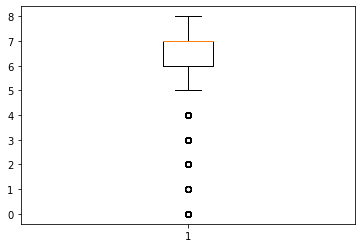

In [36]:
# Boxplot between class and stalk-color-above-ring as "stalk-color-above-ring" has the highest mean of 5.816
plt.boxplot(mushrooms['stalk-color-above-ring'])



## **Observation** :
It is observed from the above histograms and boxplot that the data we are using is a skewed data as we can observe a degree of asymmetry in distribution, In the above single histograms for each column gill-color and cap-color attributes' histograms have a little normalized distributions where as every other attribute has skewed data.

# Bivariate Analysis

In [37]:
mushrooms.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090


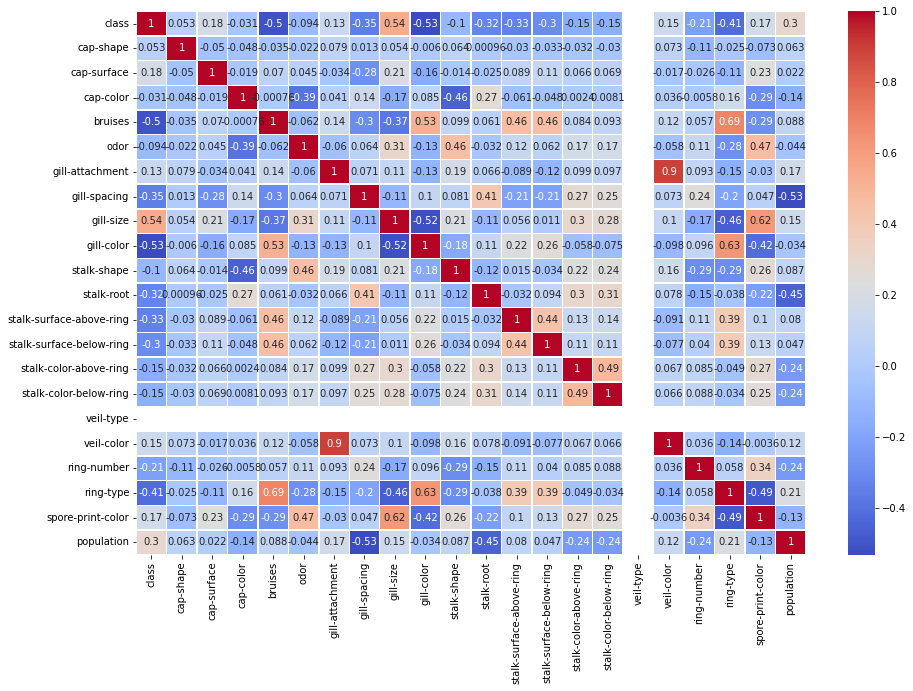

In [38]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(mushrooms.corr(),annot=True,cmap='coolwarm',linewidths=.5)

## **Observation**:
From the above heatmap plot, correlation of attribute veil-type data of the mushroom's is constant 'Nan'(zero) indicating no relationship, this column is useless in our analysis.

It is explored that Veil-color is highly correlated with the Gill-attachment with correlation value of 0.9.


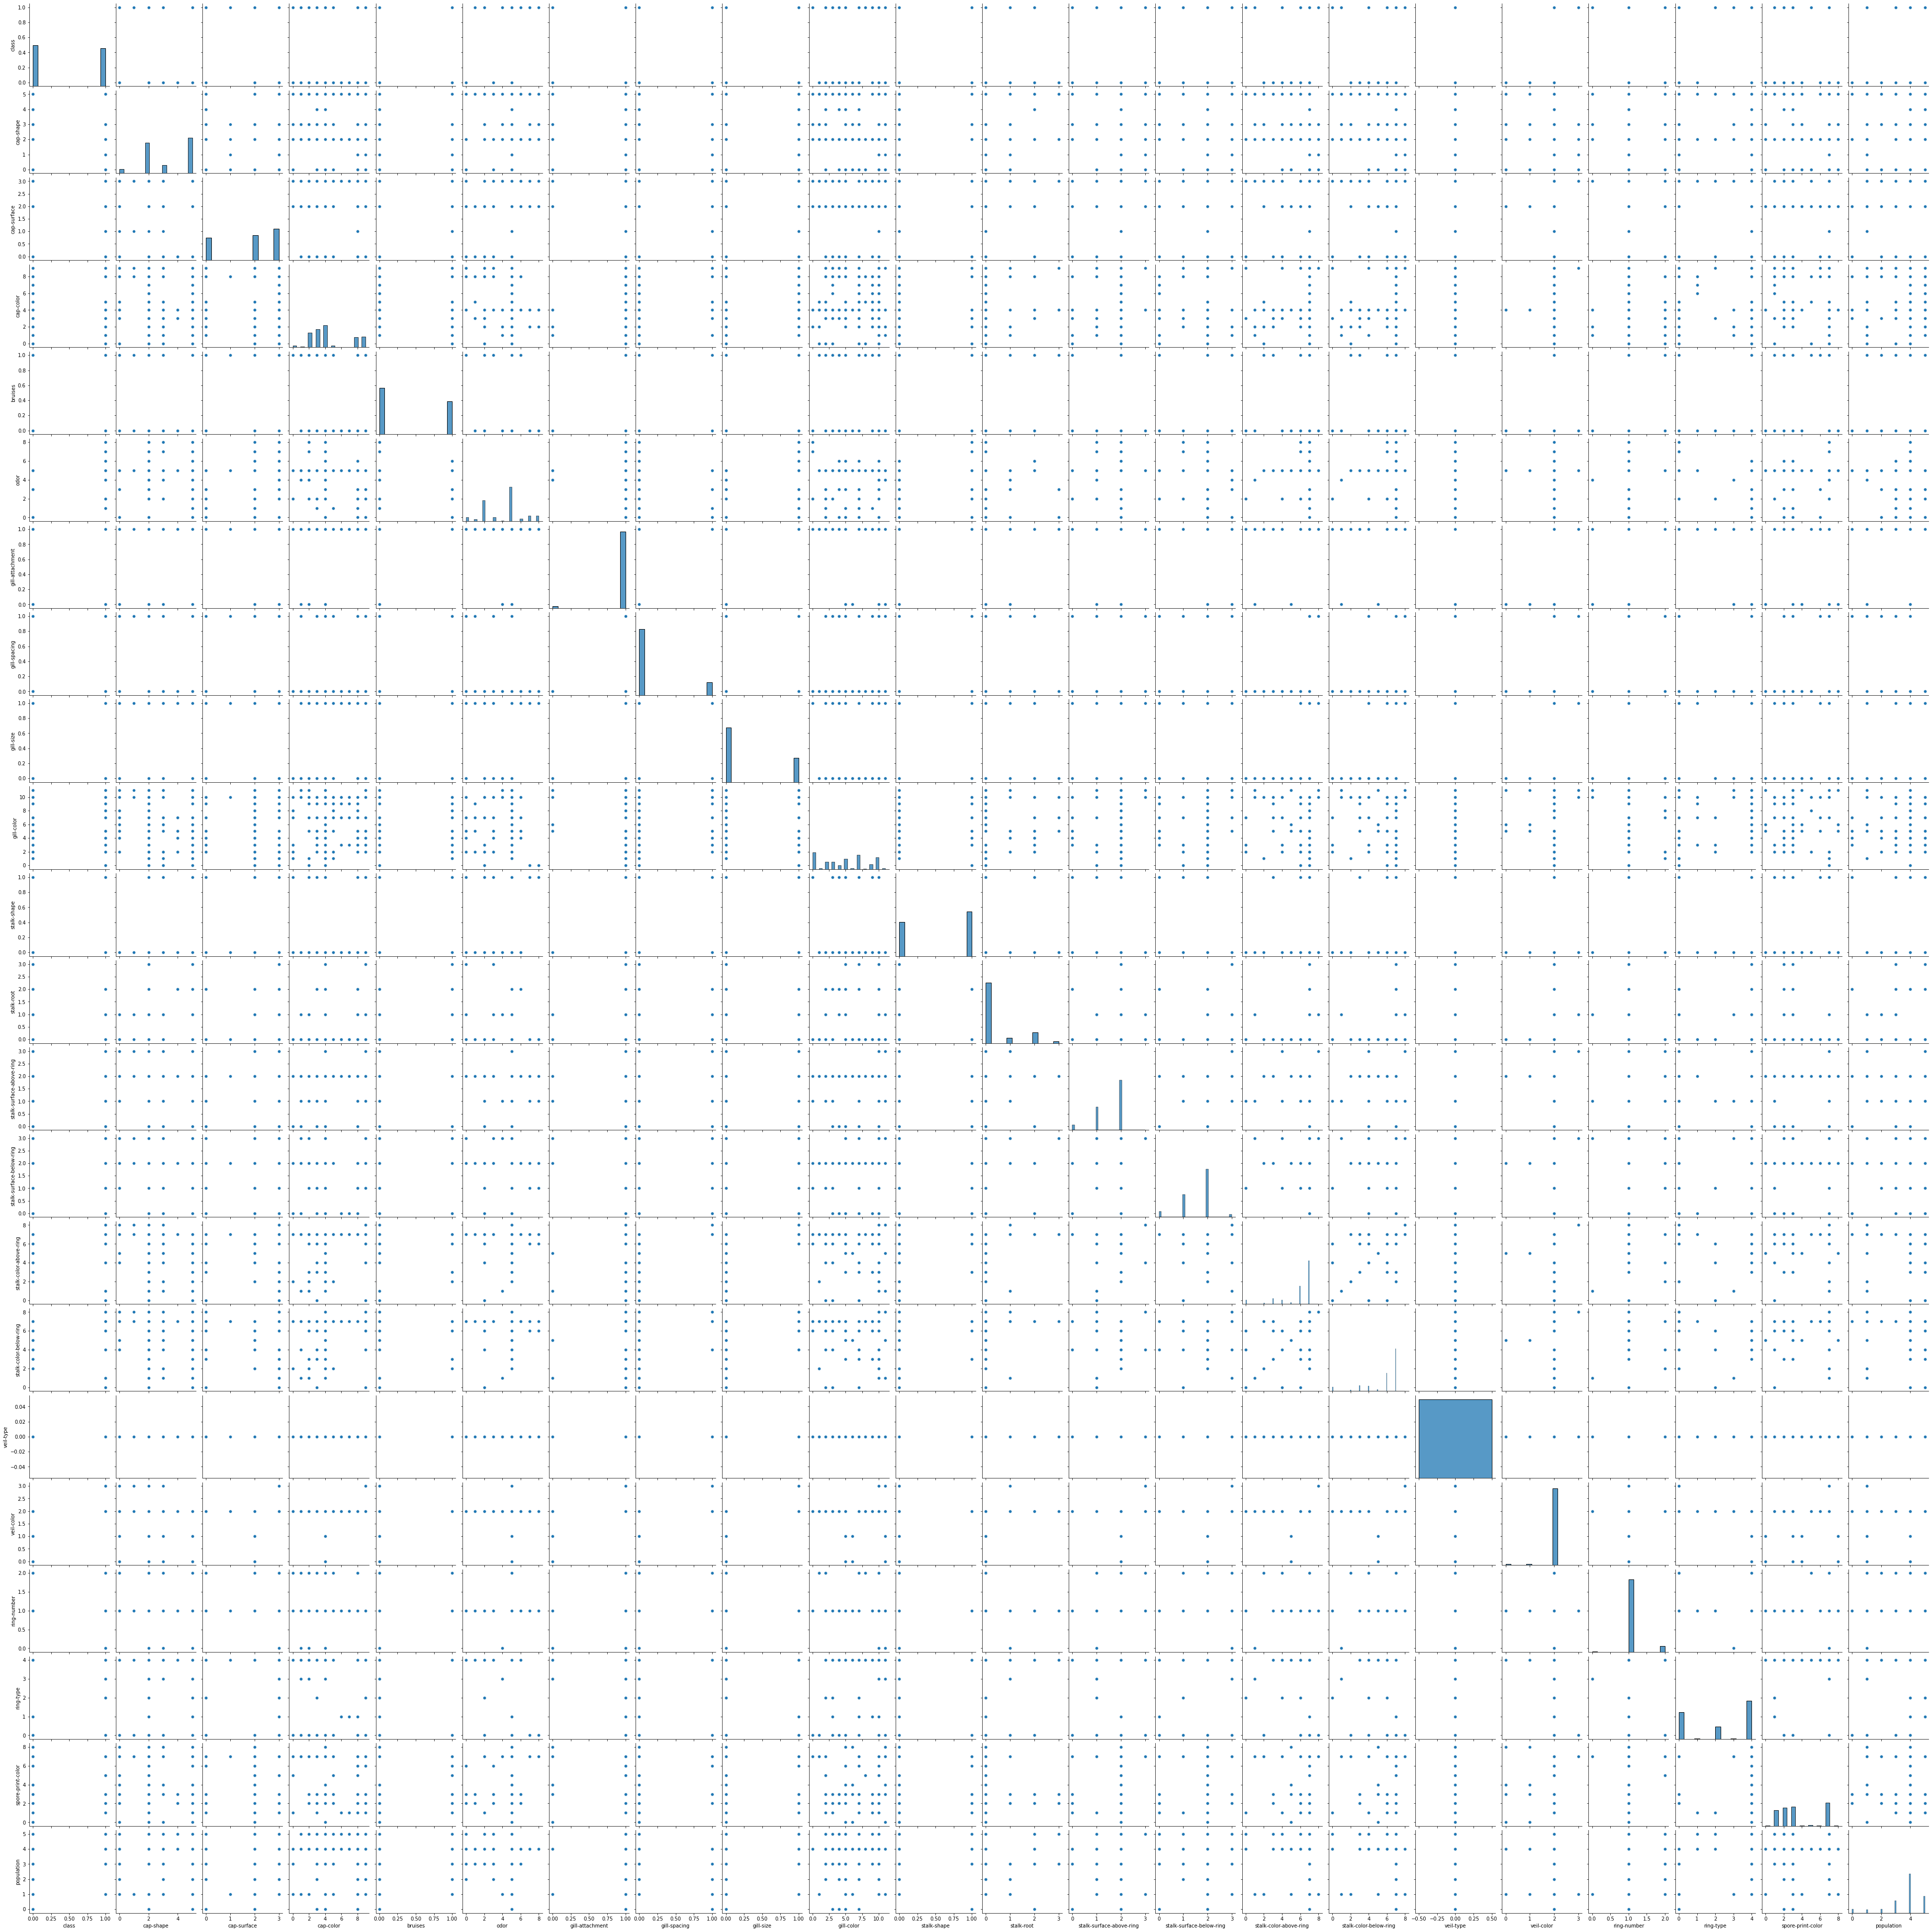

In [23]:
#Pairplot
sns.pairplot(mushrooms)

## **Observations**:
From the plots it is observed that cap-color and gill color are highly non linearly related when compared to other features.
